## Data Preparation for Time Series Analysis for Delta Air Lines Inc (NYSE: DAL)
> Delta Air Lines traded in NYSE with the ticker DAL

We can use the ticker to download the latest data through yahoo finance python package. The rationale to choose this particular stock is that first of all I was given full freedom to choose the stock by myself and DAL is a very well known Air Lines in USA. I wanted to analyse this particular stock because I have some prior experience with Air Lines industry. I have knowledge that can help me analysing the company as I do the analysis.

#### Step 0: Imposing Meta Rules for this session

In [8]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

#### Step 1: Importing Necessary Libraries and Packages
> we will import data before hand in the first cell
> you can install this with magic command like !pip install -q `packages in the requirements.txt`.

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import timedelta, date
import matplotlib.pyplot as plt
from mplfinance import mplfinance

#### Step 2: Data Collection and Processing
> Download the data, process it and save it in `./data` folder.

##### i) Download the Data

In [10]:
TICKER  = "DAL"
start   = "2007-06-01" # July 2007
end     = "2024-06-01" # July 2024
years   = (date.fromisoformat(end) - date.fromisoformat(start)) / timedelta(days=365)
print(f"{TICKER} data from {start} to {end}, {years:.2f} years in total.")
try:
    DAL = yf.download(TICKER, start=start, end=end)
except:
    print("Something went wrong while downloading. Check your network connection.")
try:
    DAL.to_csv("./dal_raw.csv")
except:
    print("Unable to save `dal_raw.csv`. Check whether you have access to files or `data` folder is there.")


DAL data from 2007-06-01 to 2024-06-01, 17.01 years in total.


[*********************100%***********************]  1 of 1 completed


##### ii) Perform Short EDA

Understanding the nature of the data

In [11]:
DAL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4280 entries, 2007-06-01 to 2024-05-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, DAL)   4280 non-null   float64
 1   (High, DAL)    4280 non-null   float64
 2   (Low, DAL)     4280 non-null   float64
 3   (Open, DAL)    4280 non-null   float64
 4   (Volume, DAL)  4280 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 200.6 KB


In [12]:
DAL['Open'] = DAL['Open'].astype(np.float64)
DAL['High'] = DAL['High'].astype(np.float64)
DAL['Low'] = DAL['Low'].astype(np.float64)
DAL['Close'] = DAL['Close'].astype(np.float64)
DAL['Volume'] = DAL['Volume'].astype(np.float64)


In [13]:
DAL.describe()

Price,Close,High,Low,Open,Volume
Ticker,DAL,DAL,DAL,DAL,DAL
count,4280.000000,4280.000000,4280.000000,4280.000000,4.280000e+03
mean,29.219222,29.665558,28.776541,29.236337,1.203678e+07
std,16.427097,16.563509,16.293873,16.433282,9.678453e+06
min,3.406375,3.519056,3.042336,3.380374,8.739000e+05
25%,10.869199,11.081560,10.678513,10.851869,7.327900e+06
50%,33.109377,33.640294,32.704645,33.141398,9.976700e+06
75%,42.725518,43.279493,42.134076,42.740597,1.382348e+07
max,60.757969,61.027319,60.007634,60.436772,2.063723e+08


As the quick statstics shows above, there are 4280 rows of numerical data. That means 3 extra rows are there as a meta data. The dataset is MultiIndexed. So, that needs to be addressed and we have no use of MultiIndex here. For the `Market Price` denoted as `Close`, average is about `$29.22`, minimum value is `$3.41` and maximum value is `$60.76`(rounded to two decimal places). So, the range is `$60.76 - $3.45 = $57.31`. Standard Deviation is `$16.43`.

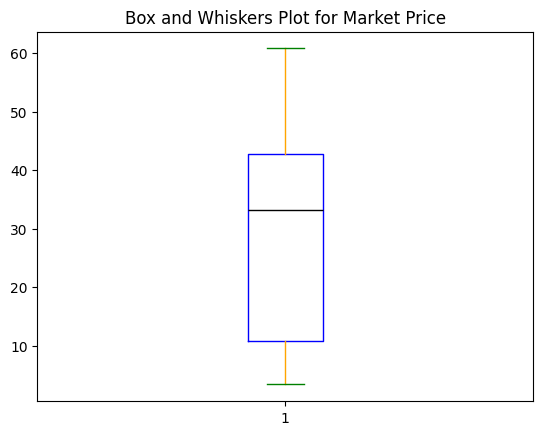

In [14]:
plt.boxplot(DAL['Close'],
            boxprops=dict(color='blue'),
            capprops=dict(color='green'),
            whiskerprops=dict(color='orange'),
            flierprops=dict(marker='o', color='red', markersize=5),
            medianprops=dict(color='black'))
plt.title("Box and Whiskers Plot for Market Price")
plt.show()

We can see there are observations that fall far away from the regular deviation. And there are quite a lot of observations that are just outliers and works as a noise to the market. Value investors may ignore them but they are also very crucial in terms of driving the market dynamics. So, outliers detection and removal is not our job here. Let them be as it is.

##### iii) Clean Data

We must remove the columns that we don't need at all. We will only use the closing price of the daily data to form our information base. But before that we must convert our dataset columns to simple indexed.

In [15]:
# make it single indexed dataset
if isinstance(DAL.columns, pd.MultiIndex):
    DAL.columns = DAL.columns.get_level_values(0) # take the first row of columns only
# save it
try:
    DAL.to_csv('./dal_single_indexed.csv') # yeah the folder is hardcoded
except:
    print("Failed to save the file")

In [16]:
DAL_Q = DAL.resample("QE").agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
DAL_Q.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2007-06-30,16.555165,17.239908,15.619055,17.075222,80677500.0
2007-09-30,16.962537,18.895425,12.949433,15.558388,213869500.0
2007-12-31,15.601724,18.288689,12.169344,12.906095,256473200.0
2008-03-31,12.767410,16.459821,6.882096,7.454155,355835700.0
2008-06-30,7.748856,9.439043,4.160459,4.940547,770592000.0


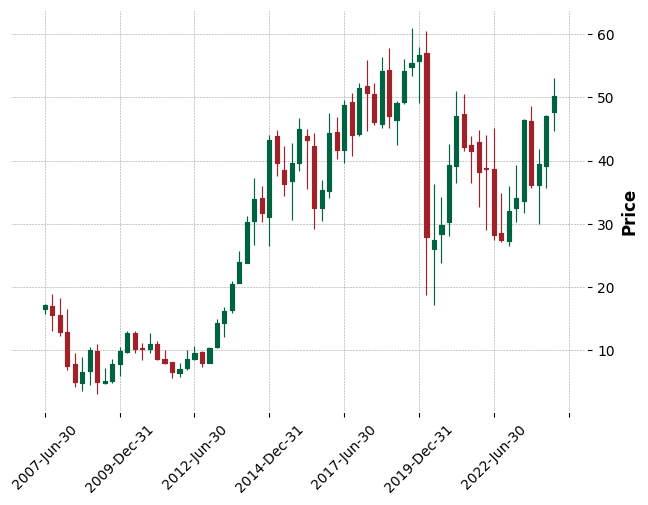

In [17]:
mplfinance.plot(DAL_Q, type="candle", style="charles")

In [18]:
# drop unnecessary columns
DAL.drop(columns=["Open", "High", "Low"], inplace=True, errors="ignore") # Volume is kept for volumetric analysis
DAL.to_csv('./dal_final.csv')

#### Step 3: Perform a Quick Visual Analysis for the Final Data

##### Show if the dataset is trending? seasonal? irregular?

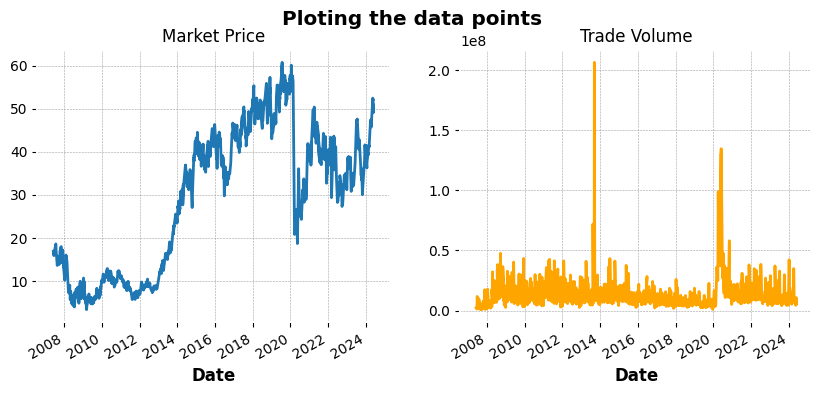

In [19]:
# irregular?
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
DAL['Close'].plot(ax=ax[0], title="Market Price")
DAL['Volume'].plot(ax=ax[1], title="Trade Volume", color="orange")
fig.suptitle("Ploting the data points")
plt.show()

The data is certainly `not irregular` 'cause we see some regularity in the pattern with our naked eye. And the data is `Trending` for sure.

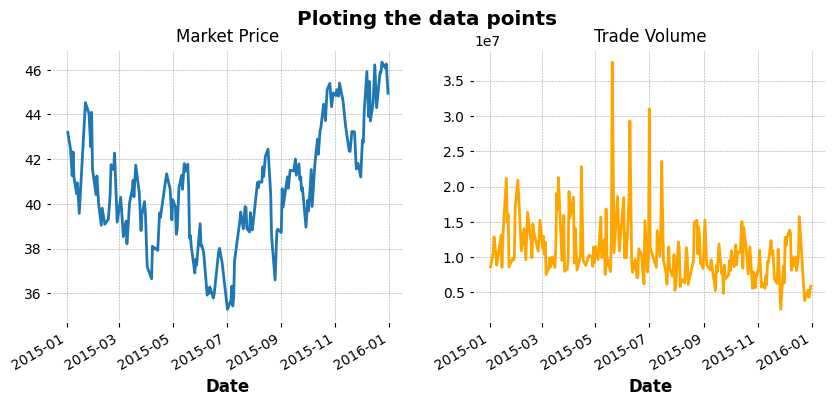

In [20]:
# seasonal?
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
DAL['Close'].where(DAL.index.year == 2015).plot(ax=ax[0], title="Market Price")
DAL['Volume'].where(DAL.index.year == 2015).plot(ax=ax[1], title="Trade Volume", color="orange")
fig.suptitle("Ploting the data points")
plt.show()

As we can see above the dataset is certainly seasonal by visual inspection.

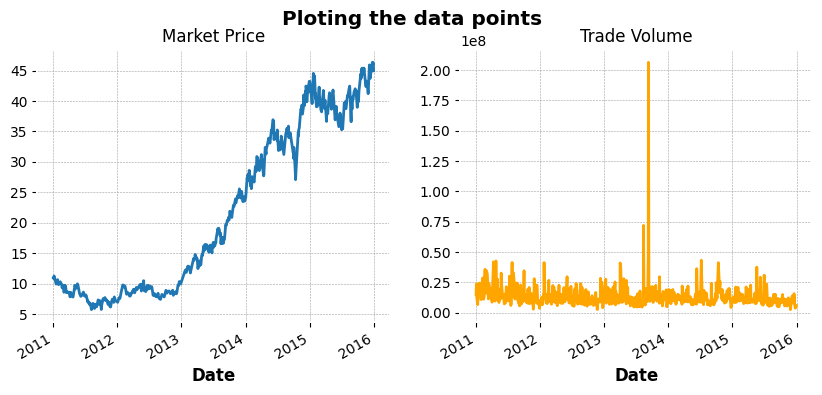

In [21]:
# cyclical?
years = range(2011, 2016, 1) # we put the gap intentionally and this does not break any condition
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
DAL['Close'].where(DAL.index.year.isin(years)).plot(ax=ax[0], title="Market Price")
DAL['Volume'].where(DAL.index.year.isin(years)).plot(ax=ax[1], title="Trade Volume", color="orange")
fig.suptitle("Ploting the data points")
plt.show()

No, the data is not `Cyclical` but `Trending` over the years.

#### Conclusion

From now onwards, we will only use the `dal_final.csv` in our analysis and notebooks. Yes, we may need to change it a little bit according to our specific needs. The dataset is ready to be used.